In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"]= (12,6)
from sklearn.cluster  import KMeans

In [3]:
df = pd.read_csv("./DataSets/driver-data.csv")
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [12]:
kmean= KMeans(n_clusters=2)

In [13]:
df_data = df.drop(["id"],axis=1)

In [15]:
kmean.fit(df_data)

KMeans(n_clusters=2)

In [17]:
kmean.cluster_centers_

array([[ 50.04763437,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [19]:
print(kmean.labels_)
print(len(kmean.labels_))

[0 0 0 ... 1 1 1]
4000


In [23]:
print(type(kmean.labels_))
unique,counts = np.unique(kmean.labels_,return_counts = True)
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 3200, 1: 800}


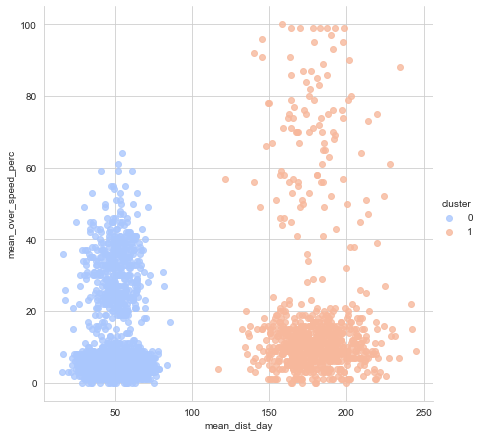

In [32]:
df_data["cluster"] = kmean.labels_
sns.set_style("whitegrid")
sns.lmplot("mean_dist_day","mean_over_speed_perc",data=df_data, hue = "cluster", palette ="coolwarm" ,size =6,
          aspect=1,fit_reg=False)